# Diagnóstico de diabetes con K-NN, Regresión lineal, SVM y Redes Neuronales.

## Equipo 1.

### Miranda Hernández Armando Misael 16111688
### Villalobos Peralta Luis Armando 16111760
### Olivas Mendoza Daniela 15111353

### Alcance
El alacance que se busca en este proyecto es el poder comparar los diferentes resultados que nos proporciona la inteligencia artificial en un ámbito práctico de la vida cotidiana. 

"Desde el año 2000, la diabetes mellitus en México es la primera causa de muerte entre las mujeres y la segunda entre los hombres"[1].  

En la mayoría de los casos y como se puede apreciar, México no es un país que sea preventivo,entonces no se tiene la educación necesaria, por lo cual, la gente no detecta en tiempo adecuado los síntomas o ignora estos mismos.

Por lo tanto, el alcance se expande para un diagnóstico preventivo y accesible para la gente que desea conocer una posibilidad de padecer o no diabetes.

### Delimitaciones

Los presentes datos recolectados fueron obtenidos a través de una exaustiva investigación en donde los datos muestras en el arvhico .csv, provienen de pacientes femeninos en un rango de edad de 21 a 81 años.

### Definiciones:

"La diabetes es un padecimiento en el cual el azúcar (o glucosa) en la sangre se encuentra en un nivel elevado. Esto se debe a que el cuerpo no produce o no utiliza adecuadamente la insulina, una hormona que ayuda a que las células transformen la glucosa (que proviene de los alimentos) en energía. Sin la suficiente insulina, la glucosa se mantiene en la sangre y con el tiempo, este exceso puede tener complicaciones graves."[2]

Entre las principales complicaciones que puede traer el padecer esta enfermedad (los cuales algunas son enfermedades secundarias), son las siguientes:

- Ceguera
- Amputaciones
- Abortos en mujeres diabeticas, etc.

Todo esto, es uno de los factores por los cuales se desarrolla este código para beneficio.


### Importación de librerías y carga del Dataset

In [1]:
# Importamos las galerías necesarias para cargar en el código el documento de entrenamiento(.csv)

import pandas as pd # Librería para manipulación de datos.
import numpy as np # Librería de soporte para vectores y matrices de datos.
import matplotlib.pyplot as plt # Librerías para graficar datos.
import matplotlib.image as mpimg # importando libreria para impresion de las imagenes

%matplotlib inline

Primeramente se carga el Dataset a utilizar en el código, esto con la ayuda de pandas para la lectura de los datos recolectados.

In [2]:
diabetes = pd.read_csv('diabetes.csv') # Lectura y carga de la base de datos.
print(diabetes.columns) # Muestra de los encabezados de las columnas.

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'EspesorPiel', 'Insulina',
       'IMC', 'HistorialDiabetes', 'Edad', 'Diagnostico'],
      dtype='object')


Se muestran los primeros cinco renglones de los datos para su  visualización con la siguiente función 
#### NOTA:
La función .head cuando no se específica un valor dentro del paréntesis, muestra por defecto los primeros cinco renglones.

In [3]:
diabetes.head() 

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diagnostico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### El conjunto de datos sobre diabetes consta de 768 datos muestra, con 9 características cada uno (los encabezados-características).

In [4]:
print("Dimension del dataset diabetes: {}".format(diabetes.shape)) #Imprime dimensión del Dataset y sus variables.

Dimension del dataset diabetes: (768, 9)


A continuacion se utiliza el método dataframe.describe() que proporciona estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada elemento.

In [5]:
diabetes.describe()

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diagnostico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Se realiza una visualizacion para conocer a los atributos caracteristicos de la informacion que se trabaja y su correlacion. En formato de histograma aparecen los ocho atributos de entrada etiquetados como: "Edad", "Embarazo","EspesorPiel”, "Glucosa","HistorialDiabetes", "IMC", "Isulina" Y "PresionSanguinea". Se puede apreciar graficamenteentre qué valores se comprenden sus minimos y maximos y en quéintervalos se concentra la mayor densidad de registros.

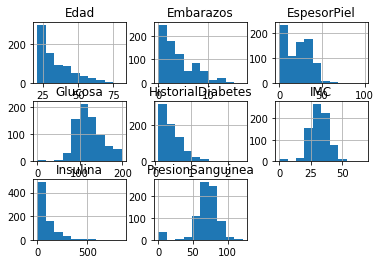

In [6]:
diabetes.drop(['Diagnostico'],1).hist() 
plt.show()

### Diagnóstico en la base de datos

Se observa en la función .head que en la columna de diagnóstico se tienen valores 0 y 1. Estos valores indican que si obtenemos un 0 el paciente del que se obtivieron los datos, tiene diabetenes. En caso contrario, si se obtiene un 1, el paciente sí tiene diabetes.

De estos 768 puntos de datos muestra, 500 están etiquetados con un diagnóstico negativo(0) y 268 positivos(1). Esto se obtiene con la siguiente función .groupby().size()




In [7]:
#NOTA: Para poder agrupar los datos en los conjuntos diferentes, es a través del grupby en donde se debe especificar el encabezado del cual se agruparán los datos de entrada (0 y 1).
print(diabetes.groupby('Diagnostico').size())

Diagnostico
0    500
1    268
dtype: int64


#### Importación de librería seaborn para graficacion de diagnóstico.



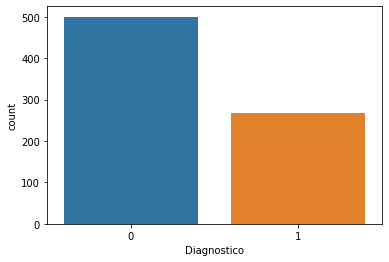

In [8]:
import seaborn as sns #Esta función sólo contabiliza los datos iguales y los grafica.

sns.countplot(diabetes['Diagnostico'],label="Contador")

A continuación se mostrarán los datos, cantidades e información en general de las columnas.

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          768 non-null    int64  
 1   Glucosa            768 non-null    int64  
 2   PresionSanguinea   768 non-null    int64  
 3   EspesorPiel        768 non-null    int64  
 4   Insulina           768 non-null    int64  
 5   IMC                768 non-null    float64
 6   HistorialDiabetes  768 non-null    float64
 7   Edad               768 non-null    int64  
 8   Diagnostico        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## K-NN (El Vecino Mas Cercano)
El algoritmo k-NN es posiblemente el algoritmo de aprendizaje automático más simple. La construcción del modelo consiste solo en almacenar el conjunto de datos de entrenamiento. Para hacer una predicción para un nuevo punto de datos, el algoritmo encuentra los puntos de datos más cercanos en el conjunto de datos de entrenamiento: sus "vecinos más cercanos". 

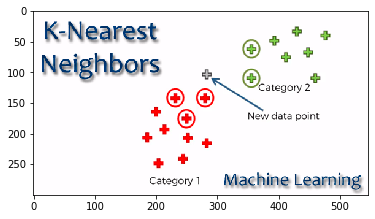

In [10]:
imagen1=mpimg.imread('KNN.png')
imgplot = plt.imshow(imagen1)
plt.show()

### Investiguemos si podemos confirmar la conexión entre la complejidad y precisión del modelo.

Para esto, creamos las listas de entrenamiento (train) y listas de prueba (test). Estas listas toman en cuenta los siguientes parámetros: 

stratify: Si no es Ninguno, los datos se dividen y clasifican, utilizando esto como las etiquetas de clase.


random_state: Controla la combinación aleatoria.

In [11]:
from sklearn.model_selection import train_test_split # Importamos la librería de sklearn. 
# Devuelve listas de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Diagnostico'], diabetes['Diagnostico'], stratify=diabetes['Diagnostico'], random_state=66)

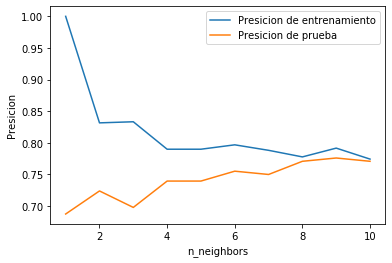

In [12]:
# Importamos la librería de KNN
from sklearn.neighbors import KNeighborsClassifier # Se agrega el clasificador del K-NN

training_accuracy = [] # Está creando un arreglo vacío donde guardará la precisión del entrenamiento.
test_accuracy = [] # Está creando un arreglo vacío donde guardará la precisión de prueba.
neighbors_settings = range(1, 11)# Probamos con n_neighbors desde 1 hasta 10 vecinos para la obtención de mejor modelo en la programación de n_neighbors
                                 #Rango en el cual se desea obtener una mayor precisión.
for n_neighbors in neighbors_settings:
    # Construimos el moddelo
    knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
    knn.fit(X_train, y_train) # Ahora se estimará una mejor función de la representación de los datos de muestra.
    # Se graba la precisión del conjunto de entrenamientoe ene el vecino indicado.
    training_accuracy.append(knn.score(X_train, y_train))
    # Se graba la precisión del conjunto de prueba en el vecino indicado.
    test_accuracy.append(knn.score(X_test, y_test)) #Compara las demás funciones 

plt.plot(neighbors_settings, training_accuracy, label="Presicion de entrenamiento")# Grafica la Precisión de entranamiento para cada n-vecinos
plt.plot(neighbors_settings, test_accuracy, label="Presicion de prueba") # Grafica la Precisión de prueba para cada n-vecinos
plt.ylabel("Presicion")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

El gráfico muestra la precisión del conjunto de entrenamiento y prueba en el eje y contra la configuración de n_neighbours en el eje x. Teniendo en cuenta que si elegimos un solo vecino más cercano, la predicción en el conjunto de entrenamiento es perfecta. Pero cuando se consideran más vecinos, la precisión del entrenamiento disminuye, lo que indica que el uso del vecino más cercano conduce a un modelo que es demasiado complejo. El mejor rendimiento es en algún lugar alrededor de 9 vecinos.

La gráfica anterior sugiere que deberíamos elegir n_neighbours = 9. Por lo tanto tenemos el siguiente modelo KNN el cual se elige por un equilibrio entre la precision de prueba y la precisión de entrenamiento:

In [13]:
knn = KNeighborsClassifier(n_neighbors=9) # Construimos el modelo con N-Vecinos = 9
knn.fit(X_train, y_train) # Ahora se estimará una mejor función de la representación de los datos de muestra.

print('Precisión de K-NN classifier en conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión de K-NN classifier en conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión de K-NN classifier en conjunto de entrenamiento: 0.79
Precisión de K-NN classifier en conjunto de prueba: 0.78


## Regresion Logistica
Logistic regression es uno de los más comunes algoritmos de clasificación.

En la regresión logística, modelamos la probabilidad de que una entrada X pertenezca a la clase por defecto Y=1, y podemos escribirlo formalmente como, P(Y=1|X). También podemos escribir P(y=0|x) = 1 - P(y=1|x). Por lo tanto, nuestro trabajo es entrenar al modelo para que establezca sus valores de parámetros de tal manera que nuestro modelo es una buena estimación de P(y=1|x).

In [14]:
from sklearn.linear_model import LogisticRegression # Se agrega el clasificador de LR

logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train) # Ahora se estimará una mejor función de la representación de los datos de muestra.
# max_iter espesifica el maximo de iteraciones


print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg.score(X_train, y_train))) # Score devuelve la precisión media en los datos de prueba y las etiquetas seleccionadas
print("Precisión del conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Precisión del conjunto de entrenamiento: 0.785
Precisión del conjunto de prueba: 0.771


"C"= al inverso de la fuerza de regularización y debe ser un flotante positivo. Los valores más pequeños especifican una regularización más fuerte. 

El valor predeterminado de C = 1 proporciona una precisión del 78% en el entrenamiento y una precisión del 77% en el conjunto de prueba.

In [15]:
logreg001 = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg001.score(X_test, y_test)))

Precisión del conjunto de entrenamiento: 0.778
Precisión del conjunto de prueba: 0.755


El uso de C = 0.01 resulta en una menor precisión tanto en el entrenamiento como en los conjuntos de prueba.

In [16]:
logreg100 = LogisticRegression(max_iter=1000,C=100).fit(X_train, y_train)
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg100.score(X_test, y_test)))

Precisión del conjunto de entrenamiento: 0.785
Precisión del conjunto de prueba: 0.766


El uso de C = 100 da como resultado una precisión un poco más alta en el conjunto de entrenamiento, una precisión un poco menor en el conjunto de prueba, lo que confirma que una menor regularización y un modelo más complejo pueden no generalizar mejor que la configuración predeterminada.

Por lo tanto, debemos elegir el valor predeterminado C = 1.

Finalmente, veamos los coeficientes aprendidos por los modelos con las tres configuraciones diferentes del parámetro de regularización C.

Una regularización más fuerte (C = 0.001) empuja los coeficientes más y más hacia cero. Al inspeccionar el gráfico más de cerca, también podemos ver esa característica "HistorialDiabetes", para C = 100, C = 1 y C = 0.001, el coeficiente es positivo. Esto indica que la función alta "HistorialDiabetes" está relacionada con una muestra que es "diabetes", independientemente del modelo que analicemos.

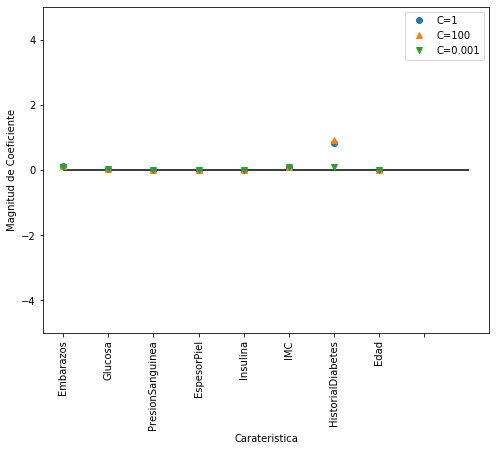

In [17]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Carateristica")
plt.ylabel("Magnitud de Coeficiente")
plt.legend()
plt.savefig('log_coef')

## Support Vector Machine

SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte.

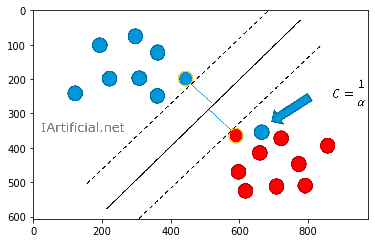

In [18]:
imagen2=mpimg.imread('SVM.png')
imgplot = plt.imshow(imagen2)
plt.show()

In [19]:
from sklearn.svm import SVC # Se agrega el clasificador de SVC

svc = SVC() # Llama la funcion SVC y la guarda en svc
svc.fit(X_train, y_train)

print("Precisión en conjunto de entramiento: {:.2f}".format(svc.score(X_train, y_train)))
print("Precisión en conjunto de prueba: {:.2f}".format(svc.score(X_test, y_test)))

Precisión en conjunto de entramiento: 0.77
Precisión en conjunto de prueba: 0.76


El modelo se adapta bastante sustancialmente, con una puntuación de 77% en el conjunto de entrenamiento y solo un 76% de precisión en el conjunto de prueba.

SVM requiere que todas las características varíen en una escala similar. Tendremos que reescalar nuestros datos para que todas las características estén aproximadamente en la misma escala:

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc1 = SVC()
svc1.fit(X_train_scaled, y_train)

print("Precisión en conjunto de entramiento: {:.2f}".format(svc1.score(X_train_scaled, y_train)))
print("Precisión en conjunto de prueba: {:.2f}".format(svc1.score(X_test_scaled, y_test)))

Precisión en conjunto de entramiento: 0.79
Precisión en conjunto de prueba: 0.80


Escalar los datos hizo una gran diferencia, Ahora estamos en un régimen de falta de equipamiento, donde el entrenamiento y el rendimiento del conjunto de pruebas son bastante similares pero no se tiene una precisión del 100%. A partir de aquí, podemos intentar aumentar C o gamma para adaptarnos a un modelo más complejo.

In [21]:
svc2 = SVC(C=1000)
svc2.fit(X_train_scaled, y_train)

print("Precisión en conjunto de entramiento: {:.3f}".format(svc2.score(X_train_scaled, y_train)))
print("Precisión en conjunto de prueba: {:.3f}".format(svc2.score(X_test_scaled, y_test)))

Precisión en conjunto de entramiento: 0.944
Precisión en conjunto de prueba: 0.724


Aquí, el aumento de C nos permite mejorar el modelo, lo que da como resultado una precisión del conjunto de prueba del 79.7%.

## Redes Neuronales

Las redes neuronales tratan de emular el pensamiento del cerebro humano, estas tienen una forma similar a una neurona. En esta se tiene un conjunto de entrada con su respectivo peso, en el cual en necesario para pasar a una funcion de activacion, la cual nos dara una salida.

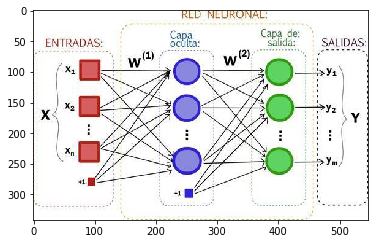

In [22]:
imagen3=mpimg.imread('RD.jpg')
imgplot = plt.imshow(imagen3)
plt.show()

MPL: el perceptron multi-capa (MLP) es un algoritmo de aprendizaje supervisado que enseña una función f(⋅):Rm→Ro por medio de un entrenamiento a un dataset, donde m es el número de dimensiones para la entrada y o es el número de dimensiones para la salida.

In [23]:
from sklearn.neural_network import MLPClassifier # Se agrega el clasificador de SVC

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Precisión en conjunto de entramiento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Precisión en conjunto de prueba: {:.2f}".format(mlp.score(X_test, y_test)))

Precisión en conjunto de entramiento: 0.73
Precisión en conjunto de prueba: 0.72


La precisión del MLP no es tan buena como la de los otros modelos, esto probablemente se deba a la escala de los datos. Las redes neuronales también esperan que todas las características de entrada varíen de manera similar, e idealmente tengan una media de 0 y una varianza de 1. Debemos reescalar nuestros datos para que cumplan estos requisitos.

In [24]:
#Importamos la función standardScaler
from sklearn.preprocessing import StandardScaler 
#Estandarice las características eliminando la media y escalando a la varianza de la unidad. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train_scaled, y_train)
#Mandamos cual es la precision de conjuntos.
print("Precision en conjunto de entramiento: {:.3f}".format(
    mlp1.score(X_train_scaled, y_train)))
print("Precision en conjunto de prueba: {:.3f}".format(mlp1.score(X_test_scaled, y_test)))

Precision en conjunto de entramiento: 0.823
Precision en conjunto de prueba: 0.802


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Los resultados son mucho mejores después de escalar. De hecho, hemos obtenido la precisión de prueba más alta hasta ahora.

In [25]:
mlp2 = MLPClassifier(max_iter=1000, random_state=0)
mlp2.fit(X_train_scaled, y_train)

print("Precisión en conjunto de entramiento: {:.3f}".format(
    mlp2.score(X_train_scaled, y_train)))
print("Precisión en conjunto de prueba: {:.3f}".format(mlp2.score(X_test_scaled, y_test)))

Precisión en conjunto de entramiento: 0.908
Precisión en conjunto de prueba: 0.792


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
mlp3 = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp3.fit(X_train_scaled, y_train)

print("Precisión en conjunto de entramiento: {:.3f}".format(
    mlp3.score(X_train_scaled, y_train)))
print("Precisión en conjunto de prueba: {:.3f}".format(mlp3.score(X_test_scaled, y_test)))

Precisión en conjunto de entramiento: 0.806
Precisión en conjunto de prueba: 0.797


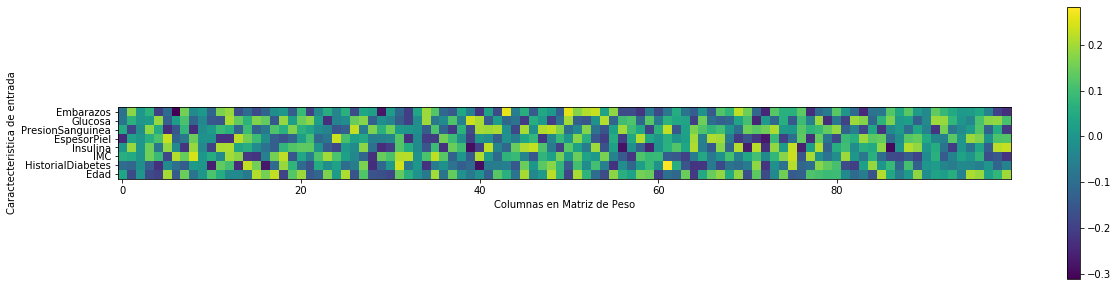

In [27]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columnas en Matriz de Peso")
plt.ylabel("Caractecteristica de entrada")
plt.colorbar()

Desde el mapa de calor, no es fácil señalar rápidamente qué características (características) tienen pesos relativamente bajos en comparación con las otras características.

### Predicciones

#### Predicciones KNN

In [28]:
print(knn.predict([[0,123,72,0,0,36.3,0.258,52]]))

[1]


In [29]:
print(knn.predict([[1,106,76,0,0,37.5,0.197,26]]))

[0]


In [30]:
print(knn.predict([[6,190,92,0,0,35.5,0.278,66]]))

[1]



#### Predicciones Regression Logistica

In [31]:
print(logreg.predict([[0,123,72,0,0,36.3,0.258,52]]))

[0]


In [32]:
print(logreg.predict([[1,106,76,0,0,37.5,0.197,26]]))

[0]


In [33]:
print(logreg.predict([[6,190,92,0,0,35.5,0.278,66]]))

[1]



#### Predicciones SVM

In [34]:
print(svc1.predict([[0,123,72,0,0,36.3,0.258,52]]))

[1]


In [35]:
print(svc.predict([[1,106,76,0,0,37.5,0.197,26]]))

[0]


In [36]:
print(svc.predict([[6,190,92,0,0,35.5,0.278,66]]))

[1]



#### Predicciones Redes Neuronales

In [37]:
print(mlp1.predict([[0,123,72,0,0,36.3,0.258,52]]))

[1]


In [38]:
print(mlp1.predict([[1,106,76,0,0,37.5,0.197,26]]))

[1]


In [39]:
print(mlp1.predict([[6,190,92,0,0,35.5,0.278,66]]))

[1]


### Conclusion

Como conclusion aprendimos a aplicar una amplia gamma de modelos de aprendizaje automatico para entrenamiento y prediccion con ayuda de una base de datos, los cuales tienen hasta cierto punto ventajas y desventajas, tambien logramos comprender la importancia de los parametros de regularizacion para las funciones de entrenamiento y de prueba en diferentes clasificadores, todo esto con el fin de una buena estandarizacion de los datos con  el mejor redimiento.

### Referencias Bibliográficas

[1]. Rojas Martínez, María Rosalba, et al, “Epidemiología de la diabetes mellitus en México”, en Aguilar Salinas, Carlos A. et al, (eds), Acciones para enfrentar a la diabetes. Documento de postura. Academia Nacional de Medicina de México, México, 2015.

[2]. Medline plus, Diabetes.Disponible en http://www.nlm.nih.gov/medlineplus/spanish/diabetes.html [Consultado el 15 de mayo de 2015]